### Coins segmentation and counting

#### Part 1a: Detect all coins in the image using edge detection


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

# Load the image
img = cv2.imread('coins.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)


# Visualize the edges
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.show()


: 

#### Part 1b. Segmentation of Each Coin
Using cv2's coutour detection function

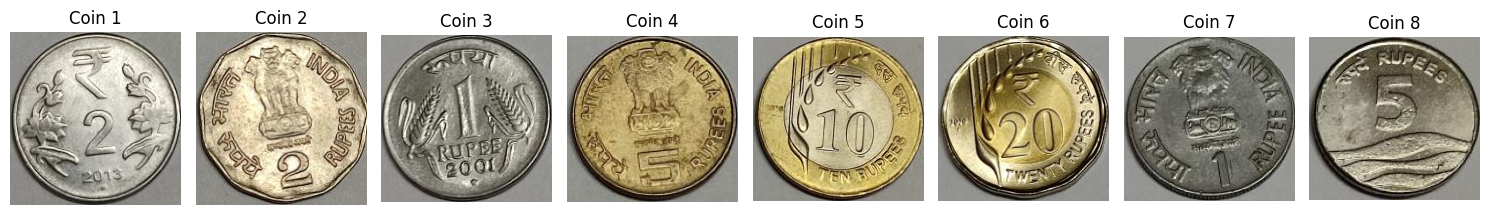

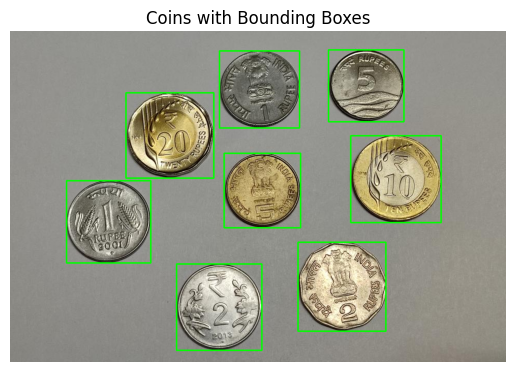

In [2]:
# Step 2: Apply adaptive thresholding or Otsu's method to binarize the image
_, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 3: Find contours of the coins in the binary image
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to visualize the segmentation
segmented_img = img.copy()

# List to hold the segmented coin regions
segmented_coins = []

# Step 4: Loop through the contours to isolate each coin
for contour in contours:
    # Ignore small contours which may be noise
    if cv2.contourArea(contour) > 1000:  # You can adjust the area threshold based on the size of coins
        # Get the bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Crop the coin region from the original image
        coin_region = img[y:y+h, x:x+w]

        # Append the segmented coin to the list
        segmented_coins.append(coin_region)

        # Draw a bounding box around each coin in the image for visualization
        cv2.rectangle(segmented_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Step 5: Visualize the segmented coins
fig, axes = plt.subplots(1, len(segmented_coins), figsize=(15, 5))
for i, coin in enumerate(segmented_coins):
    axes[i].imshow(cv2.cvtColor(coin, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f"Coin {i+1}")
plt.tight_layout()
plt.show()

# Optionally, visualize the image with bounding boxes around the coins
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
plt.title("Coins with Bounding Boxes")
plt.axis('off')
plt.show()


#### Alternate method: Using K means first and then getting the binary image from the output of k means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from skimage import data


# Load the image
image = cv2.imread('coins.jpg')
# image = data.coins()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale

# Plot 1: Original Image
plt.figure(figsize=(6, 4))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Plot 2: Grayscale Image
plt.figure(figsize=(6, 4))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Reshape the image into a 2D array of pixels
pixels = gray.reshape((-1, 1))

# Apply K-Means clustering
k = 3  # Assuming more clusters for better segmentation
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)

# Get the clustered labels and reshape back to the image dimensions
segmented = kmeans.labels_.reshape(gray.shape)

# Plot 3: K-Means Clustering Output
plt.figure(figsize=(6, 4))
plt.imshow(segmented, cmap='gray')
plt.title("K-Means Segmentation")
plt.axis('off')
plt.show()

# Convert the segmented output to binary image (Thresholding)
segmented_binary = (segmented == segmented.max()).astype(np.uint8) * 255  # Ensure coins are white (255)

# Plot 4: Binary Segmentation Output
plt.figure(figsize=(6, 4))
plt.imshow(segmented_binary, cmap='gray')
plt.title("Binary Segmentation Output")
plt.axis('off')
plt.show()

# Find contours of the segmented coins
contours, _ = cv2.findContours(segmented_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for visualization
segmented_img = image.copy()

# List to hold the segmented coin regions
segmented_coins = []

# Loop through the contours to extract each coin
for contour in contours:
    # Ignore small contours (noise)
    if cv2.contourArea(contour) > 900:  # Adjust this threshold based on coin size
        # Get bounding box for each coin
        x, y, w, h = cv2.boundingRect(contour)

        # Crop the coin region from the original image
        coin_region = image[y:y+h, x:x+w]

        # Append segmented coin to the list
        segmented_coins.append(coin_region)

        # Draw bounding box around each coin
        cv2.rectangle(segmented_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Plot 5: Image with Bounding Boxes
plt.figure(figsize=(6, 4))
plt.imshow(segmented_img)
plt.title("Coins with Bounding Boxes")
plt.axis('off')
plt.show()

# Plot 6: Display the segmented coins individually
fig, axes = plt.subplots(1, len(segmented_coins), figsize=(15, 5))

# Ensure axes is iterable
if len(segmented_coins) == 1:
    axes = [axes]

for i, coin in enumerate(segmented_coins):
    axes[i].imshow(coin)
    axes[i].axis('off')
    axes[i].set_title(f"Coin {i+1}")

plt.tight_layout()
plt.show()


#### Part 1c: Count the Total Number of Coins by counting the contours that we detected from the prev. method






In [4]:
def count_coins(binary_mask):
    """
    Function to count the total number of coins detected in the image.

    Parameters:
        binary_mask (numpy array): Binary mask of the segmented coins.

    Returns:
        int: Total number of coins detected.
    """
    # Detect contours in the binary image
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Count valid contours (ignoring small noise)
    coin_count = sum(1 for contour in contours if cv2.contourArea(contour) > 900)

    return coin_count

# Call the function on our segmented binary image
total_coins = count_coins(binary_img)

# Display the result
print(f"Total Number of Coins Detected: {total_coins}")


Total Number of Coins Detected: 8


#### Part 1c: Count the Total Number of Coins using Hough transform






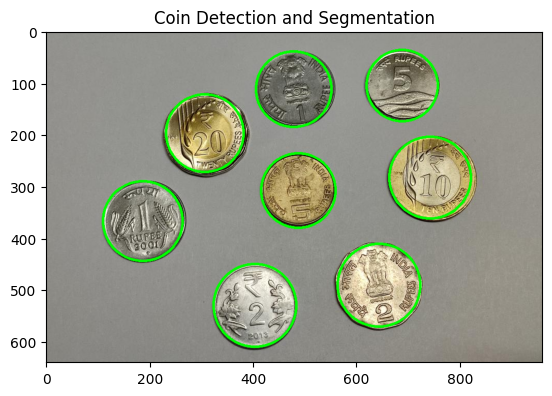

In [5]:
# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=150,
                           param1=50, param2=150, minRadius=20, maxRadius=100)

# Convert circles to integer
circles = np.round(circles[0, :]).astype("int")

# Visualize the circles on the original image
for (x, y, r) in circles:
    cv2.circle(img, (x, y), r, (0, 255, 0), 4)

# Display the image with detected coins
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Coin Detection and Segmentation")
plt.show()


In [6]:
# Count the number of detected coins
num_coins = len(circles)
print(f"Total number of coins detected: {num_coins}")


Total number of coins detected: 8


### Image Stiching